## A Machine Learning approach for Malware Detection

Importing all the required libraries

In [1]:
# ESSEX - Task 2
# Latesh Kumar KJ, lkumarkj@fiu.edu
# School of Computing and Information Science, FIU
import io
import sys
import os
import pandas
import numpy
import pickle
import pefile
import matplotlib.pyplot as plt 
import sklearn.ensemble as ek
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel


import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model as sk
from sklearn.metrics import classification_report

Loading the initial dataset delimited by | 

In [2]:
dataset = pandas.read_csv('task_data.csv',low_memory=False)

In [3]:
dataset.head()

,fileType,malicious,issue_368,issue_69,issue_74,issue_75,issue_76,issue_77,issue_78,issue_79,...,content_4,content_5,content_6,content_8,content_9,content_11,content_0,content_1,content_7,content_10
0,xls,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,0,1
1,pdf,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,docx,1,0,0,0,0,0,0,0,0,...,0,0,2,3,10,0,0,0,0,1
3,pptx,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,35
4,ppt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,9


In [4]:
dataset.describe()

,malicious,issue_368,issue_69,issue_74,issue_75,issue_76,issue_77,issue_78,issue_79,issue_80,...,content_4,content_5,content_6,content_8,content_9,content_11,content_0,content_1,content_7,content_10
count,11830.000000,11830.000000,11830.0,11830.000000,11830.0,11830.0,11830.0,11830.0,11830.0,11830.0,...,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000,11830.000000
mean,0.554776,0.076923,0.0,0.000254,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055114,4.311919,10.540406,1.263314,6.824937,1.695351,0.027557,0.027557,0.540321,488.633728
std,0.497012,2.385425,0.0,0.015923,0.0,0.0,0.0,0.0,0.0,0.0,...,1.153824,68.401230,117.621702,6.076851,12.168480,20.049824,0.166776,0.166776,18.857296,9346.574955
min,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,1.000000,217.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,71.000000,3617.000000,8609.000000,309.000000,709.000000,936.000000,4.000000,4.000000,1107.000000,628241.000000


Number of malicious files vs Legitimate files in the training set

In [5]:
dataset.groupby(dataset['malicious']).size()

malicious
0    5267
1    6563
dtype: int64

Dropping columns like Name of the file, MD5 (message digest) and label

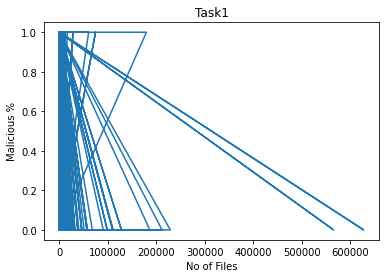

In [6]:
X = dataset.drop(['fileType','malicious'],axis=1).values
y = dataset['malicious'].values
plt.plot(X, y) 
plt.xlabel('No of Files') 
# naming the y axis 
plt.ylabel('Malicious %') 
    
# giving a title to my graph 
plt.title('Task1') 
    
# function to show the plot 
plt.show() 

##### ExtraTreesClassifier
ExtraTreesClassifier fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting

In [7]:
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

ExtraTreesClassifier helps in selecting the required features useful for classifying a file as either Malicious or Legitimate

14 features are identified as required by ExtraTreesClassifier

In [8]:
nbfeatures

18

######  Cross Validation
Cross validation is applied to divide the dataset into random train and test subsets.
test_size = 0.2 represent the proportion of the dataset to include in the test split 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
 

In [10]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

The features identified by ExtraTreesClassifier

In [11]:
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, dataset.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(dataset.columns[2+f])

X_train

1. feature content_8 (0.257995)
2. feature content_9 (0.243421)
3. feature content_10 (0.139229)
4. feature content_3 (0.094294)
5. feature content_5 (0.041384)
6. feature content_6 (0.039388)
7. feature issue_163 (0.032568)
8. feature content_11 (0.022379)
9. feature issue_103 (0.019808)
10. feature content_7 (0.018439)
11. feature issue_101 (0.017295)
12. feature issue_144 (0.014993)
13. feature issue_260 (0.011153)
14. feature issue_22 (0.006403)
15. feature issue_368 (0.005372)
16. feature content_4 (0.004859)
17. feature issue_191 (0.003257)
18. feature issue_148 (0.002569)


array([[  0,   0,   0, ...,   0,   0,   3],
       [  0,   0,   0, ...,   0,   0,   2],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,  48],
       [  0,   0,   0, ...,   0,   0,   9],
       [  0,   0,   0, ...,   0,   0, 341]])

Building the below Machine Learning model (TASk 1(2))

In [12]:
model = { "DecisionTree":DecisionTreeClassifier(max_depth=10),
         "RandomForest":ek.RandomForestClassifier(n_estimators=50),
         "Adaboost":ek.AdaBoostClassifier(n_estimators=50),
         "GradientBoosting":ek.GradientBoostingClassifier(n_estimators=50),
         "GNB":GaussianNB(),
         "LinearRegression":LinearRegression()   
}

Training each of the model with the X_train and testing with X_test.
The model with best accuracy will be ranked as winner

In [13]:
results = {}
for algo in model:
    clf = model[algo]
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    print ("%s : %s " %(algo, score))
    results[algo] = score

DecisionTree : 0.9277261200338124 
RandomForest : 0.9294167371090448 
Adaboost : 0.9171597633136095 
GradientBoosting : 0.9137785291631445 
GNB : 0.6614539306846999 
LinearRegression : 0.16298728921031158 


In [14]:
winner = max(results, key=results.get)
joblib.dump(model[winner],'classifier/classifier.pkl')
open('classifier/features.pkl', 'wb').write(pickle.dumps(features))
clf = winner

#es = clf.predict(X_new)
#t = confusion_matrix(y, res)
#rint("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
#rint('False negative rate : %f %%' % ( (mt[1][0] / float(sum(mt[1]))*100)))




Saving the model

In [15]:
# Load classifier
clf = joblib.load('classifier/features.pkl')
#load features
features = open ('classifier/features.pkl')
#features = pickle.loads(open(os.path.join('/home/dell/Downloads/GLS/classifier/features.pkl'),'r').read())

##### Testing with unseen file
Given any unseen test file, it's required to extract the characteristics of the given file.  

In order to test the model on an unseen file, it's required to extract the characteristics of the given file. Python's pefile.PE library is used to construct and build the feature vector and a ML model is used to predict the class for the given file based on the already trained model. 

In [16]:
# %load malware_test.py
"""
this file extracts the required information of a given file using the library PE 

"""

import pefile
import os
import array
import math
import pickle

import joblib
import getopt, sys
import argparse



def get_entropy(data):
    if len(data) == 0:
        return 0.0
    occurences = array.array('L', [0]*256)
    for x in data:
        occurences[x if isinstance(x, int) else ord(x)] += 1

    entropy = 0
    for x in occurences:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x*math.log(p_x, 2)

    return entropy


def get_resources(pe):
    """Extract resources :
    [entropy, size]"""
    resources = []
    if hasattr(pe, 'DIRECTORY_ENTRY_RESOURCE'):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, 'directory'):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, 'directory'):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = get_entropy(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

def get_version_info(pe):
    """Return version infos"""
    res = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == 'StringFileInfo':
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    res[entry[0]] = entry[1]
        if fileinfo.Key == 'VarFileInfo':
            for var in fileinfo.Var:
                res[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe, 'VS_FIXEDFILEINFO'):
          res['flags'] = pe.VS_FIXEDFILEINFO.FileFlags
          res['os'] = pe.VS_FIXEDFILEINFO.FileOS
          res['type'] = pe.VS_FIXEDFILEINFO.FileType
          res['file_version'] = pe.VS_FIXEDFILEINFO.FileVersionLS
          res['product_version'] = pe.VS_FIXEDFILEINFO.ProductVersionLS
          res['signature'] = pe.VS_FIXEDFILEINFO.Signature
          res['struct_version'] = pe.VS_FIXEDFILEINFO.StrucVersion
    return res

#extract the info for a given file
def extract_infos(fpath):
    res = {}
    pe = pefile.PE(fpath)
    res['Machine'] = pe.FILE_HEADER.Machine
    res['SizeOfOptionalHeader'] = pe.FILE_HEADER.SizeOfOptionalHeader
    res['Characteristics'] = pe.FILE_HEADER.Characteristics
    res['MajorLinkerVersion'] = pe.OPTIONAL_HEADER.MajorLinkerVersion
    res['MinorLinkerVersion'] = pe.OPTIONAL_HEADER.MinorLinkerVersion
    res['SizeOfCode'] = pe.OPTIONAL_HEADER.SizeOfCode
    res['SizeOfInitializedData'] = pe.OPTIONAL_HEADER.SizeOfInitializedData
    res['SizeOfUninitializedData'] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
    res['AddressOfEntryPoint'] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
    res['BaseOfCode'] = pe.OPTIONAL_HEADER.BaseOfCode
    try:
        res['BaseOfData'] = pe.OPTIONAL_HEADER.BaseOfData
    except AttributeError:
        res['BaseOfData'] = 0
    res['ImageBase'] = pe.OPTIONAL_HEADER.ImageBase
    res['SectionAlignment'] = pe.OPTIONAL_HEADER.SectionAlignment
    res['FileAlignment'] = pe.OPTIONAL_HEADER.FileAlignment
    res['MajorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
    res['MinorOperatingSystemVersion'] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
    res['MajorImageVersion'] = pe.OPTIONAL_HEADER.MajorImageVersion
    res['MinorImageVersion'] = pe.OPTIONAL_HEADER.MinorImageVersion
    res['MajorSubsystemVersion'] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
    res['MinorSubsystemVersion'] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
    res['SizeOfImage'] = pe.OPTIONAL_HEADER.SizeOfImage
    res['SizeOfHeaders'] = pe.OPTIONAL_HEADER.SizeOfHeaders
    res['CheckSum'] = pe.OPTIONAL_HEADER.CheckSum
    res['Subsystem'] = pe.OPTIONAL_HEADER.Subsystem
    res['DllCharacteristics'] = pe.OPTIONAL_HEADER.DllCharacteristics
    res['SizeOfStackReserve'] = pe.OPTIONAL_HEADER.SizeOfStackReserve
    res['SizeOfStackCommit'] = pe.OPTIONAL_HEADER.SizeOfStackCommit
    res['SizeOfHeapReserve'] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
    res['SizeOfHeapCommit'] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
    res['LoaderFlags'] = pe.OPTIONAL_HEADER.LoaderFlags
    res['NumberOfRvaAndSizes'] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes

    # Sections
    res['SectionsNb'] = len(pe.sections)
    entropy = map(lambda x:x.get_entropy(), pe.sections)
    res['SectionsMeanEntropy'] = sum(entropy)/float(len(entropy))
    res['SectionsMinEntropy'] = min(entropy)
    res['SectionsMaxEntropy'] = max(entropy)
    raw_sizes = map(lambda x:x.SizeOfRawData, pe.sections)
    res['SectionsMeanRawsize'] = sum(raw_sizes)/float(len(raw_sizes))
    res['SectionsMinRawsize'] = min(raw_sizes)
    res['SectionsMaxRawsize'] = max(raw_sizes)
    virtual_sizes = map(lambda x:x.Misc_VirtualSize, pe.sections)
    res['SectionsMeanVirtualsize'] = sum(virtual_sizes)/float(len(virtual_sizes))
    res['SectionsMinVirtualsize'] = min(virtual_sizes)
    res['SectionMaxVirtualsize'] = max(virtual_sizes)

    #Imports
    try:
        res['ImportsNbDLL'] = len(pe.DIRECTORY_ENTRY_IMPORT)
        imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
        res['ImportsNb'] = len(imports)
        res['ImportsNbOrdinal'] = len(filter(lambda x:x.name is None, imports))
    except AttributeError:
        res['ImportsNbDLL'] = 0
        res['ImportsNb'] = 0
        res['ImportsNbOrdinal'] = 0

    #Exports
    try:
        res['ExportNb'] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
    except AttributeError:
        # No export
        res['ExportNb'] = 0
    #Resources
    resources= get_resources(pe)
    res['ResourcesNb'] = len(resources)
    if len(resources)> 0:
        entropy = map(lambda x:x[0], resources)
        res['ResourcesMeanEntropy'] = sum(entropy)/float(len(entropy))
        res['ResourcesMinEntropy'] = min(entropy)
        res['ResourcesMaxEntropy'] = max(entropy)
        sizes = map(lambda x:x[1], resources)
        res['ResourcesMeanSize'] = sum(sizes)/float(len(sizes))
        res['ResourcesMinSize'] = min(sizes)
        res['ResourcesMaxSize'] = max(sizes)
    else:
        res['ResourcesNb'] = 0
        res['ResourcesMeanEntropy'] = 0
        res['ResourcesMinEntropy'] = 0
        res['ResourcesMaxEntropy'] = 0
        res['ResourcesMeanSize'] = 0
        res['ResourcesMinSize'] = 0
        res['ResourcesMaxSize'] = 0

    # Load configuration size
    try:
        res['LoadConfigurationSize'] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
    except AttributeError:
        res['LoadConfigurationSize'] = 0


    # Version configuration size
    try:
        version_infos = get_version_info(pe)
        res['VersionInformationSize'] = len(version_infos.keys())
    except AttributeError:
        res['VersionInformationSize'] = 0
    return res

 
if __name__ == '__main__':
        
    clf = joblib.load('classifier/classifier.pkl')
    
    dbfile = open('classifier/features.pkl','rb')
    string=""
    
    features = bytes(string, 'utf-8')
    features = bytes(pickle.loads(dbfile,'utf-8')                         
    data = extract_infos(sys.argv[1])                                          
    pe_features = map(lambda x:data[x], features)
    res= clf.predict([pe_features])[0]    
    print('The file %s is %s' % (os.path.basename(sys.argv[1]),['malicious', 'legitimate'][res]))    

SyntaxError: invalid syntax (<ipython-input-16-f1381a4d917d>, line 193)

Let's run the program to test the file - Skype.exe

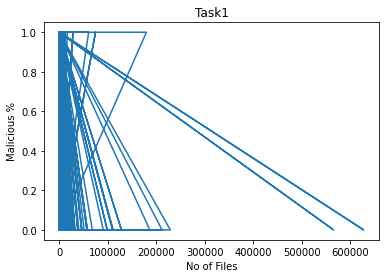

1. feature content_8 (0.262287)
2. feature content_9 (0.238191)
3. feature content_10 (0.143508)
4. feature content_3 (0.080889)
5. feature content_5 (0.049579)
6. feature content_6 (0.041370)
7. feature issue_163 (0.032238)
8. feature content_11 (0.021225)
9. feature issue_103 (0.019546)
10. feature content_7 (0.019175)
11. feature issue_101 (0.018038)
12. feature issue_144 (0.014807)
13. feature issue_260 (0.011298)
14. feature issue_368 (0.006067)
15. feature issue_22 (0.005845)
16. feature content_4 (0.004809)
17. feature issue_191 (0.003487)
18. feature issue_148 (0.002665)
DecisionTree : 0.9268808114961962 
RandomForest : 0.9327979712595097 
Adaboost : 0.9171597633136095 
GradientBoosting : 0.9137785291631445 
GNB : 0.6614539306846999 
LinearRegression : 0.16298728921031158 


SyntaxError: invalid syntax (<ipython-input-17-f1381a4d917d>, line 193)

SyntaxError: invalid syntax (<ipython-input-17-f1381a4d917d>, line 193)

In [17]:
%run malware-classification.ipynb "/home/dell/Downloads/test.pdf"

To test for the malicious file, an application has been downloaded from paloaltonetworks.com

In [ ]:
%run malware-classification.ipynb "/home/dell/Downloads/wildfire-test-pe-file.exe"